In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
np.random.seed(42)

In [2]:
#lettura csv
filepath = r"C:\Users\lucap\OneDrive\Desktop\PhD\Paper SDS\Walden 97-19 integrated v2.csv"
df = pd.read_csv(filepath, sep = ";" )
#df = df[df['m_anno_indagine'] > 2016] #seleziono le righe che riguardano l'osservatorio dal 2019 in poi
df = df[df['m_anno_indagine']>=2017].drop_duplicates(subset='IDU', keep="last")
df = df[
   df.columns[ df.isna().sum() <= 0.3 * len(df) ] ]#seleziono solo le colonne hanno valori Nan inferiori al 30%
# Rimuovere gli spazi bianchi da tutte le colonne
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

le = LabelEncoder()
df['m_sesso'] = le.fit_transform(df['m_sesso'])
df['m_p_pubblico_privato'] = le.fit_transform(df['m_p_pubblico_privato'])
df['m_p_nascita_in_italia_genitori'] = le.fit_transform(df['m_p_nascita_in_italia_genitori'])

In [3]:
varsToDrop = ['IDU','m_anno_indagine','m_pesos','m_peso',"m_p_cittadinanza", "m_p_data_nascita", "m_modalita_telefono_vs_online",
    'm_p_comune_istat',
                'm_p_data_nascita','m_p_eta_6',
                    'm_p_in_ita_dal','m_p_origini',
                            'm_sr_professione','m_sr_statusSocioEconomico_ceto',"m_p_autocol"
                            ] # rimuovo regioni perchè uso one hot e non voglio aumentare troppo il numero di colonne
df= df.drop(varsToDrop, axis=1)

In [4]:
column_names = {
    'm_p_r_eta': 'Age',
    'm_ac_privilegio_lavoratori_sett_pubblico': 'Public Sector Worker Privilege',
    'm_ac_propensioneRischio_italia_vs_europa': 'Risk Propensity Italy vs Europe',
    'm_ac_importanza_partiti': 'Importance of Parties',
    'm_ac_diminuzione_ruolo_partiti': 'Decrease in Party Role',
    'm_ac_affidamento_pubblica_tecnici': 'Reliance on Public Technocrats',
    'm_ac_valori_resistenza_altra_epoca': 'Resistance Values from Another Era',
    'm_ac_sindacato_ancoraUtile': 'Unions Still Useful',
    'm_ac_uguaglianza_sociale_frena_individui': 'Social Equality Restrains Individuals',
    'm_ac_troppo_focus_uguaglianza_vs_merito': 'Too Much Focus on Equality vs Merit',
    'm_ac_meglio_uguaglianza_vs_merito_singolo': 'Better Equality vs Individual Merit',
    'm_op_disorientamento_veros_realta_quotidiana': 'Disorientation vs Daily Reality',
    'm_ac_vantaggi_globalizz_economie_mercati': 'Globalization Advantages in Markets',
    'm_ac_dovere_difesa_produzPaese_vs_globaliz': 'Duty to Defend National Production',
    'm_ac_nonSicuro_doveVive': 'Not Safe Where You Live',
    'm_ac_repressione_unicaArma_vs_crimin': 'Repression as Only Weapon Against Crime',
    'm_ac_crimin_diventera_incontenibile': 'Crime Will Become Uncontainable',
    'm_ac_validita_insegnamChiesa': 'Validity of Church Teachings',
    'm_ac_societa_troppoPermissiva_gay': 'Society Too Permissive of Gays',
    'm_ac_legalizz_drogheLeggere': 'Legalization of Soft Drugs',
    'm_ac_chiesa_nonDovrebbe_condizionare_stato.1': 'Church Shouldn’t Influence State',
    'm_ac_testamento_biologico': 'Biological Will',
    'm_ac_immigrati_rubano_lavoro': 'Immigrants Steal Jobs',
    'm_ac_immigrati_risorsa': 'Immigrants as a Resource',
    'm_ac_immigrati_portano_criminalita': 'Immigrants Bring Crime',
    'm_ac_immigrati_devono_adeguarsi': 'Immigrants Must Adapt',
    'm_ac_immigrati_diritto_voto': 'Immigrants’ Right to Vote',
    'm_ac_immigrati_nonRispettano_regoleDelloStareInsieme': 'Immigrants Don’t Respect Social Rules',
    'm_op_sentimento_italianoVSeuropeo': 'Italian vs European Sentiment',
    'm_ac_modernizzazioneItalia_grazie_UE': 'Modernization of Italy Thanks to EU',
    'm_ac_religioneIslamica_pericoloPerTutti': 'Islamic Religion as Danger to All',
    'm_ac_musulmaniInItalia_dirittoReligione_inScuole': 'Muslims’ Right to Religion in Schools',
    'm_ac_italia_troppeConcessioni_immigratiMusulmani': 'Too Many Concessions to Muslim Immigrants',
    'm_ac_generazioniFuture_vivrannoPeggio': 'Future Generations Will Live Worse',
    'm_op_partecipazione_in_UE': 'Participation in EU',
    'm_ac_troppo_allarmismo_ecologia_inquinamento': 'Too Much Alarmism About Ecology and Pollution',
    'm_ac_sviluppoEconomico_incompatibileCon_tutelaAmbiente': 'Economic Development Incompatible with Environmental Protection',
    'm_ac_preoccupazione_situazioneAmbientale_luogoInCuiVivo': 'Concern About Environmental Situation Where You Live',
    'm_ac_difesa_scuolaPubblica_insensata': 'Defending Public School is Nonsensical',
    'm_ac_attuale_classeInsegnante_incompetente': 'Current Teaching Staff Incompetent',
    'm_ac_problemi_eticiMorali_sperimentazioneGenetica': 'Ethical and Moral Issues in Genetic Experimentation',
    'm_ac_nord_unicoMotore_economiaItaliana': 'North is the Only Engine of Italian Economy',
    'm_ac_lavoroNord_consente_diEssere_alPasso_con_UE': 'Work in North Keeps Pace with EU',
    'm_ac_guerre_talvolta_maleNecessario.1': 'Wars Sometimes a Necessary Evil',
    'm_ac_italia_ipartecipazioneIn_missioniMilitariEstere': 'Participation in Foreign Military Missions',
    'm_ac_lavorare_importante_postoStabile_no': 'Work Important but Not a Stable Job',
    'm_op_rinuncie_per_postoStabile': 'Sacrifices for a Stable Job',
    'm_ac_badare_propriInteressi_perSopravvivere': 'Look After Own Interests to Survive',
    'm_ac_modelloImprenditorialePrivato_unico_produceRicchezzaPerTutti': 'Private Entrepreneurial Model Produces Wealth for All',
    'm_ac_modelloImprenditorialePrivato_unico_garantireEquita': 'Private Entrepreneurial Model Ensures Fairness',
    'm_ac_italia_riparte_solo_puntandoSu_cittaEterritori_noStatoCentrale': 'Revives by Focusing on Cities and Territories, Not Central State',
    'm_ac_dazi_su_produzioni_importanti': 'Tariffs on Important Productions',
    'm_ac_generazionePrecedente_migliore_qualitaVita': 'Previous Generation Had Better Quality of Life',
    'm_ac_meno_relazioniSociali_amicali_vs_qualcheAnnoFa': 'Fewer Social and Friendly Relations Compared to Few Years Ago',
    'm_op_fiducia_negli_amici_che_fanno_parte_della_sua_rete_social_network': 'Trust in Friends on Social Network',
    'm_op_fiducia_nei_suoi_parenti': 'Trust in Relatives',
    'm_op_fiducia_negli_amici_e_conoscenti_dei_suoi_familiari': 'Trust in Friends and Acquaintances of Family Members',
    'm_op_fiducia_nei_colleghi_di_lavoro': 'Trust in Colleagues',
    'm_op_aiutoReciproco_inCasoDiBisogno_degli_italiani': 'Mutual Help Among Italians in Case of Need',
    'm_op_aiutoReciproco_inCasoDiBisogno_dei_colleghi_di_lavoro': 'Mutual Help Among Colleagues in Case of Need',
    'm_op_ottica_di_beneComune_italia': 'View of Common Good in Italy',
    'm_op_ottica_di_beneComune_comuneResidenza': 'View of Common Good in Municipality',
    'm_op_attivita_associazionismo_Italia': 'Associative Activities in Italy',
    'm_op_importanza_nellaSocieta_altruismo': 'Importance of Altruism in Society',
    'm_op_importanza_nellaSocieta_mutualismo': 'Importance of Mutualism in Society',
    'm_op_danni_populismo_in_italia': 'Damage of Populism in Italy',
    'm_op_peso_volontariato_in_economiaPaese': 'Weight of Volunteering in National Economy',
    'm_TREND_25_IMMIGRAZIONE_atteggiamento_POSITIVO_nei_confronti_degli_immigrati': 'Positive Attitude Towards Immigrants',
    'm_TREND_26_NAZIONE_EUROPA': 'Nation vs Europe',
    'm_TREND_30_ISLAM_tolleranza_e_fiducia_nei_confronti_dell_Islam': 'Tolerance and Trust Towards Islam',
    'm_TREND_53_IL_PERICOLO_POPULISTA': 'The Populist Danger',
    'm_p_int_voto':'Voting Intentions'
}

In [5]:
diz_aliases_int_voto = {"Partito Democratico-PD":'Sx/CSx',
                "Partito Democratico":'Sx/CSx',
                "Lega con Salvini":'Dx/CDx',
                "Lega Nord":'Dx/CDx',
                "Lega":'Dx/CDx',
                "Forza Italia":'Dx/CDx',
                "Fratelli d'Italia":"Dx/CDx",
                'MoVimento 5 Stelle':'M5S',
                'Movimento 5 stelle':'M5S',
                'voterei  scheda bianca / annullerei la scheda':'astensione/indecisi',
                'voterei scheda bianca / scheda nulla':'astensione/indecisi',
                "+Europa":'Sx/CSx',
                "piu' Europa con Emma Bonino": "Sx/CSx",
                'Sinistra italiana (SEL + altri)':'Sx/CSx',
                'Potere al Popolo':'Sx/CSx',
                'Rifondazione Comunista':'Sx/CSx',
                "Fratelli d'Italia-Alleanza Nazionale&nbsp;":"Dx/CDx",
                'La Sinistra':'Sx/CSx',
                'Verdi':'Sx/CSx',
                'non andrei a votare':'astensione/indecisi',
                'sono indeciso' : 'astensione/indecisi',
                'Liberi e Uguali' : 'Sx/CSx',
                'Italia dei Valori' : 'Sx/CSx',
                'Scelta Civica&nbsp;' : 'Sx/CSx',
                'Italia Unica di Corrado Passera' : 'Sx/CSx',
                "Noi con l'Italia UDC&nbsp;" : 'Dx/CDx',
                "altro partito di area di governo (SVP, Centro Democratico....)" : 'Altro partito',
                "Nuovo Centro Destra con UDC e PPI" : 'Altro partito'
                }

In [6]:
df['m_p_int_voto'] = df['m_p_int_voto'].replace(diz_aliases_int_voto)
df['m_p_int_voto'].value_counts()

m_p_int_voto
Sx/CSx                       1348
Dx/CDx                       1094
astensione/indecisi           969
M5S                           869
preferisco non rispondere     150
Altro partito                  74
Name: count, dtype: int64

In [7]:
df = df[~df['m_p_int_voto'].isin(['Altro partito', 'preferisco non rispondere','astensione/indecisi'])]

In [8]:
df.shape

(3311, 204)

In [9]:
diz_aliases_ac = {"del tutto d'accordo":2,
            "del tutto<BR>d'accordo":2,
		     "d'accordo":1,
		     "ne' d'accordo ne' in disaccordo (NON STIMOLARE)":0,
             "ne d'accordo ne' in disaccordo":0,
             "ne' d'accordo ne' in disaccordo":0,
             "preferisco non rispondere":0,
             "preferisco<BR>non<BR> rispondere":0,
            "non saprei":0,
             "in disaccordo":-1,
             'del tutto in disaccordo':-2,
             "del tutto disaccordo":-2,
             "del tutto<BR>in disaccordo":-2,
             
            
}

nomi_var = df.columns.tolist()
for var in nomi_var:
    if '_ac_' in var:
        df[var] = df[var].replace(diz_aliases_ac)
        
        
diz_aliases_op = {"molto":2,
            "poco":-1,
            "pocao":-1,
		     "abbastanza":1,
		     "non saprei":0,
            "nessuno":-2,
            "per niente":-2}

nomi_var = df.columns.tolist()
for var in nomi_var:
    if 'op' in var:
        df[var] = df[var].replace(diz_aliases_op)
        

diz_aliases_trend = {"in trend":1,
                 "slight in trend":1,
                 "slight off trend":0,
                 "off trend":0,
                 'non classificati':0}
 
nomi_var = df.columns.tolist()
for var in nomi_var:
    if 'TREND' in var:
        df[var] = df[var].replace(diz_aliases_trend)
        
        
diz_aliases_scol = {"elementare/privo di titolo":1,
                 "media inferiore":1,
                 "diploma di maturita` (5 anni)":2,
                 "superiori in corso":2,
                 'diploma di istituto professionale (3 anni)':2,
                 'universita` in corso/nessuna laurea conseguita':4,
                 'laurea triennale di I livello':4,
                 'diploma universitario/laurea breve':4,
                 'laurea specialistica di II livello o laurea 4-5 anni':4,
                 'master/scuola di specializzazione post laurea':4,
                 'dottorato di ricerca':4
                 }
 
df['m_p_scolarita'] = df['m_p_scolarita'].replace(diz_aliases_scol)



diz_aliases_geo = {'meno di 5.000':1,
                 'da 5.001 a 10.000':1,
                 'da 10.001 a 30.000':2,
                 'da 30.001 a 100.000':2,
                 'da 100.001 a 250.000':3,
                 'piu` di 250.001':3
                 }
 
df['m_p_r_ampiezza6'] = df['m_p_r_ampiezza6'].replace(diz_aliases_geo)

diz_aliases_eco = {
                 "mi sento povero e non arrivo mai a fine mese":-1,
                 "avverto difficolta'":-1,
                 "arrivo a fine mese con molte difficolta'":-1,
                 "con tranquillita'":1,
                 'agiatamente':1
                 }
 
df['m_op_come_reddito_consenteDiVivere'] = df['m_op_come_reddito_consenteDiVivere'].replace(diz_aliases_eco)


df = pd.get_dummies(df, columns=['m_op_preferenza_lavorativa'], prefix='prf_lav',dtype=int)

#df = pd.get_dummies(df, columns=['m_p_zona_5istat'], prefix='zona')
df = pd.get_dummies(df, columns=['m_istat_reg'], prefix='reg',dtype=int)

diz_aliases_quot = {
                 0:0,
                 'preferisco non rispondere':0,
                 "si alcune volte alla settimana":1,
                 "si ogni giorno":1
                 }
 
df['m_p_lettura_quotidiani'] = df['m_p_lettura_quotidiani'].replace(diz_aliases_quot)

diz_aliases_freq_y = {'mai':0,
                     "piu' raramente":0,
                 "alcune volte l'anno":1,
                  "piu' volte alla settimana":2,
                 'mensile':1,
                 'settimanale':2}
 
nomi_var = df.columns.tolist()
for var in nomi_var:
    if 'm_p_' in var:
        df[var] = df[var].replace(diz_aliases_freq_y)
        
        
diz_aliases_freq = {'non saprei':0,
                     "non ascolto la radio":0,
                 "da piu' di un'ora fino a due ore":1,
                  "da piu' di tre ore fino a quattro ore":2,
                 'oltre quattro':2,
                 "da piu' di due ore fino a tre ore":2,
                 "meno di un'ora":1}
 
nomi_var = df.columns.tolist()
for var in nomi_var:
    if 'm_p_' in var:
        df[var] = df[var].replace(diz_aliases_freq)
        

diz_aliases_comp = {
                 0:0,
                 'inferiore':-1,
                 'uguale':0,
                 "maggiore":1,
                 'nan':0
                 }
 
df['m_op_disorientamento_realta_quotidiana_vs_3anniFa'] = df['m_op_disorientamento_realta_quotidiana_vs_3anniFa'].replace(diz_aliases_comp)


diz_aliases_situazEconomic = {
    'rimasta la stessa': 0,
    'peggiorata': -1,
    'non sa/non risponde': 0,
    'nan': 0,
    'migliorata': 1
}
df['m_op_situazEconomic_propria_ultimi10anni'] = df['m_op_situazEconomic_propria_ultimi10anni'].replace(diz_aliases_situazEconomic)


diz_aliases_futEconomic = {
    'peggiorare': -1,
    'rimanere la stessa': 0,
    'non sa/non risponde': 0,
    'nan': 0,
    'migliorare': 1
}
df['m_op_situazEconomic_futura'] = df['m_op_situazEconomic_futura'].replace(diz_aliases_futEconomic)


diz_aliases_abo = {
    'una cattiva legge': -1,
    'una legge buona ma che va cambiata': 1,
    'una buona legge': 1,
    'non saprei/preferisco non rispondere': 0,
    'nan': 0
}

df['m_op_legge_aborto_1987'] = df['m_op_legge_aborto_1987'].replace(diz_aliases_abo)


diz_aliases_eut = {
    'no': -1,
    'si': 2,
    'non sa/non risponde': 0,
    'dipende dalle condizioni':1
}

df['m_op_favore_eutanasia_a_determinate_condizioni'] = df['m_op_favore_eutanasia_a_determinate_condizioni'].replace(diz_aliases_eut)


diz_aliases_identita = {
    "piu' europeo che italiano": 2,
    'sia italiano che europeo': 1,
    'solo italiano': -2,
    "piu' italiano che europeo": -1,
    'non sa - non risponde': 0,
    'solo europeo': 2,
    'nan': 0
}
df['m_op_sentimento_italianoVSeuropeo'] = df['m_op_sentimento_italianoVSeuropeo'].replace(diz_aliases_identita)


diz_aliases_modernizzazione = {
    'si sta modernizzando': 1,
    'sta regredendo': -1,
    'non sa/non risponde': 0,
    'nan': 0
}
df['m_modernizz_vs_regress_Paese'] = df['m_modernizz_vs_regress_Paese'].replace(diz_aliases_modernizzazione)


diz_aliases_vantaggi = {
    "piu' vantaggi": 1,
    'vantaggi e svantaggi in egual misura': 0,
    "piu' svantaggi": -1,
    "ne' vantaggi ne' svantaggi": 0,
    'non sa/non risponde': 0,
    'nan': None
}
df['m_op_partecipazione_in_UE'] = df['m_op_partecipazione_in_UE'].replace(diz_aliases_vantaggi)


diz_aliases_livello = {
    'bassa': -1,
    'media': 1,
    'alta': 2,
    0: 0,
    'nan': None
}
nomi_var = df.columns.tolist()
for var in nomi_var:
    if 'm_op_attenzione_' in var:
        df[var] = df[var].replace(diz_aliases_livello)
        
        
diz_aliases_andamento = {
    'rimasta uguale': 0,
    'peggiorata': -1,
    'migliorata': 1,
    0: 0,
    'nan': None
}
df['m_op_scuolaPubblica_ultimiAnni'] = df['m_op_scuolaPubblica_ultimiAnni'].replace(diz_aliases_andamento)


diz_aliases_quantita = {
    1: 1,
    'poca&nbsp;': -1,
    'molta': 2,
    'nessuna': -2,
    0: 0,
    'nan': None
}
nomi_var = df.columns.tolist()
for var in nomi_var:
    if 'm_op_fiducia_' in var:
        df[var] = df[var].replace(diz_aliases_quantita)
        
        
diz_aliases_postoStabile = {
    "d'accordo": 1,
    'in disaccordo': -1,
    "del tutto d'accordo": 2,
    'del tutto in disaccordo': -2,
    'preferisco non rispondere': 0,
    'nan': None
}
df['m_op_rinuncie_per_postoStabile'] = df['m_op_rinuncie_per_postoStabile'].replace(diz_aliases_postoStabile)


diz_aliases_pop = {
    'molti danni': 2,
    'nessun danno': 0,
    'qualche danno': 1,
    0: 0,
    'nan': None
}
df['m_op_danni_populismo_in_italia'] = df['m_op_danni_populismo_in_italia'].replace(diz_aliases_pop)

varsToDrop_val = ["m_op_unita_nazionale", 'm_op_costituzione.1','m_op_miglioramento_rapp_stato_cittadini','m_op_ventennio',
'm_op_criminalita_ultimiAnni_doveVive','m_op_cambio_legge_aborto','m_op_organizzazioneEuropa_futuro', 'm_op_fiducia_in_sindacati','m_p_iscrizione_sindacato'
,'m_op_tensioneSociale_italianiVSextracom_propriaCitta','m_op_sistemaScolasticoItaliano','m_op_reazione_a_discussioni_politiche',
'm_op_fiducia_negli_altri','m_op_inclusione_societa','m_op_margineIntervento_vita','m_op_paure_della_vecchiaia','m_fiducia_proprieIdee_rispetto_avvenimentiMondo'
,'m_op_origine_maggiorImpulso_ripresa_italia', 'm_op_profilo_socioCulturale_vs_genitori','m_op_causePrincipali_violenzaDonne_1','m_op_causePrincipali_violenzaDonne_2',
'm_op_circostanze_cheGiustificano_violenzaMoglie','m_op_priorita_per_affrontare_violenzaDonne_1','m_op_priorita_per_affrontare_violenzaDonne_2', 'm_TREND_15_FASCISMO NEW',
'm_op_quanto_populista_PD','m_op_quanto_populista_M5S','m_op_quanto_populista_Lega','m_op_quanto_populista_FI','m_op_definizione_populismo',
'm_op_caratteristiche_dei_politici_apprezzati','m_op_cosa_contradistingue_comunita','m_op_pericoliEdisagi_figli_cheSpaventano_genitori_04',
'm_op_pericoliEdisagi_figli_cheSpaventano_genitori_03','m_op_pericoliEdisagi_figli_cheSpaventano_genitori_02','m_op_pericoliEdisagi_figli_cheSpaventano_genitori_01',
'm_op_definizione_bene_comune','m_op_comunita_appartenenza_01','m_p_zona_5istat','m_op_rimanere_in_propriaZona_vs_spostarsi',
'm_ac_preparazione_nuoveGenerazioni_piuScadente','m_op_attualita_concetti_sinistraCentroDestra','m_op_importanza_essereItaliano',
'm_op_attitudine_italiani_fascismo']
df= df.drop(varsToDrop_val, axis=1)

In [10]:
df.shape

(3311, 188)

In [11]:
best_set = ['m_p_r_eta',
 'm_ac_privilegio_lavoratori_sett_pubblico',
 'm_ac_propensioneRischio_italia_vs_europa',
 'm_ac_importanza_partiti',
 'm_ac_diminuzione_ruolo_partiti',
 'm_ac_affidamento_pubblica_tecnici',
 'm_ac_valori_resistenza_altra_epoca',
 'm_ac_sindacato_ancoraUtile',
 'm_ac_uguaglianza_sociale_frena_individui',
 'm_ac_troppo_focus_uguaglianza_vs_merito',
 'm_ac_meglio_uguaglianza_vs_merito_singolo',
 'm_op_disorientamento_veros_realta_quotidiana',
 'm_ac_vantaggi_globalizz_economie_mercati',
 'm_ac_dovere_difesa_produzPaese_vs_globaliz',
 'm_ac_nonSicuro_doveVive',
 'm_ac_repressione_unicaArma_vs_crimin',
 'm_ac_crimin_diventera_incontenibile',
 'm_ac_validita_insegnamChiesa',
 'm_ac_societa_troppoPermissiva_gay',
 'm_ac_legalizz_drogheLeggere',
 'm_ac_chiesa_nonDovrebbe_condizionare_stato.1',
 'm_ac_testamento_biologico',
 'm_ac_immigrati_rubano_lavoro',
 'm_ac_immigrati_risorsa',
 'm_ac_immigrati_portano_criminalita',
 'm_ac_immigrati_devono_adeguarsi',
 'm_ac_immigrati_diritto_voto',
 'm_ac_immigrati_nonRispettano_regoleDelloStareInsieme',
 'm_op_sentimento_italianoVSeuropeo',
 'm_ac_modernizzazioneItalia_grazie_UE',
 'm_ac_religioneIslamica_pericoloPerTutti',
 'm_ac_musulmaniInItalia_dirittoReligione_inScuole',
 'm_ac_italia_troppeConcessioni_immigratiMusulmani',
 'm_ac_generazioniFuture_vivrannoPeggio',
 'm_op_partecipazione_in_UE',
 'm_ac_troppo_allarmismo_ecologia_inquinamento',
 'm_ac_sviluppoEconomico_incompatibileCon_tutelaAmbiente',
 'm_ac_preoccupazione_situazioneAmbientale_luogoInCuiVivo',
 'm_ac_difesa_scuolaPubblica_insensata',
 'm_ac_attuale_classeInsegnante_incompetente',
 'm_ac_problemi_eticiMorali_sperimentazioneGenetica',
 'm_ac_nord_unicoMotore_economiaItaliana',
 'm_ac_lavoroNord_consente_diEssere_alPasso_con_UE',
 'm_ac_guerre_talvolta_maleNecessario.1',
 'm_ac_italia_ipartecipazioneIn_missioniMilitariEstere',
 'm_ac_lavorare_importante_postoStabile_no',
 'm_op_rinuncie_per_postoStabile',
 'm_ac_badare_propriInteressi_perSopravvivere',
 'm_ac_modelloImprenditorialePrivato_unico_produceRicchezzaPerTutti',
 'm_ac_modelloImprenditorialePrivato_unico_garantireEquita',
 'm_ac_italia_riparte_solo_puntandoSu_cittaEterritori_noStatoCentrale',
 'm_ac_dazi_su_produzioni_importanti',
 'm_ac_generazionePrecedente_migliore_qualitaVita',
 'm_ac_meno_relazioniSociali_amicali_vs_qualcheAnnoFa',
 'm_op_fiducia_negli_amici_che_fanno_parte_della_sua_rete_social_network',
 'm_op_fiducia_nei_suoi_parenti',
 'm_op_fiducia_negli_amici_e_conoscenti_dei_suoi_familiari',
 'm_op_fiducia_nei_colleghi_di_lavoro',
 'm_op_aiutoReciproco_inCasoDiBisogno_degli_italiani',
 'm_op_aiutoReciproco_inCasoDiBisogno_dei_colleghi_di_lavoro',
 'm_op_ottica_di_beneComune_italia',
 'm_op_ottica_di_beneComune_comuneResidenza',
 'm_op_attivita_associazionismo_Italia',
 'm_op_importanza_nellaSocieta_altruismo',
 'm_op_importanza_nellaSocieta_mutualismo',
 'm_op_danni_populismo_in_italia',
 'm_op_peso_volontariato_in_economiaPaese',
 'm_TREND_25_IMMIGRAZIONE_atteggiamento_POSITIVO_nei_confronti_degli_immigrati',
 'm_TREND_26_NAZIONE_EUROPA',
 'm_TREND_30_ISLAM_tolleranza_e_fiducia_nei_confronti_dell_Islam',
 'm_TREND_53_IL_PERICOLO_POPULISTA',
 'm_p_int_voto']

In [12]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('à', 'a')
df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '').str.replace(' ', '_')
df.columns = df.columns.str.replace('[()\']+|,\s*', '', regex=True)

In [13]:
df = df[best_set].copy()
df.shape

(3311, 72)

In [14]:
df = df.rename(columns=column_names)

In [15]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('à', 'a')
df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '').str.replace(' ', '_')
df.columns = df.columns.str.replace('[()\']+|,\s*', '', regex=True)

In [16]:
tt=df.isna().sum()

In [17]:
df = df.fillna(0)

In [18]:
df.shape

(3311, 72)

In [19]:
df.shape

(3311, 72)

In [20]:
df['Voting_Intentions'].value_counts()

Voting_Intentions
Sx/CSx    1348
Dx/CDx    1094
M5S        869
Name: count, dtype: int64

In [21]:
df = df.reset_index(drop=True)

In [22]:
def standardize_non_binary_columns(df):
    # Trova colonne non binarie
    non_binary_columns = [col for col in df.columns if df[col].nunique() > 2]
    
    # Crea un copia del DataFrame originale
    df_std = df.copy()
    
    # Standardizza solo le colonne non binarie
    scaler =  MinMaxScaler()
    df_std[non_binary_columns] = scaler.fit_transform(df_std[non_binary_columns])
    
    return df_std

In [23]:
X = df.drop(columns = ['Voting_Intentions'])
y = df['Voting_Intentions']

In [24]:
X = standardize_non_binary_columns(X)

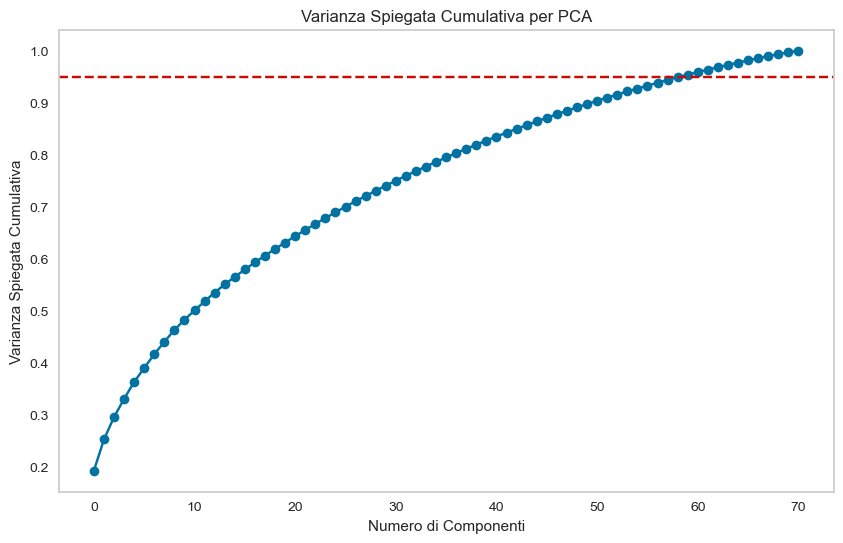

Numero di componenti che spiegano almeno il della varianza: 60


In [25]:
# Applica la PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Varianza spiegata cumulativa
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Grafico della varianza spiegata cumulativa
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Numero di Componenti')
plt.ylabel('Varianza Spiegata Cumulativa')
plt.title('Varianza Spiegata Cumulativa per PCA')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

# Scegli il numero di componenti che spiega almeno il 95% della varianza
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Numero di componenti che spiegano almeno il della varianza: {n_components}')


In [26]:
pca = PCA(n_components=58)
X_pca = pca.fit_transform(X)

In [27]:
#Initiating PCA to reduce dimentions aka features to 3

pca.fit(X)
PCA_ds = pd.DataFrame(pca.transform(X))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
0,3311.0,-6.008818e-17,1.128018,-2.276692,-0.931404,-0.206877,0.960153,2.589610
1,3311.0,1.073003e-17,0.628579,-2.741826,-0.382626,-0.009359,0.364239,3.163500
2,3311.0,-3.862812e-17,0.531464,-1.728598,-0.380101,0.001604,0.364671,2.061904
3,3311.0,-3.004409e-17,0.480395,-1.471282,-0.320988,0.019319,0.323759,1.605611
4,3311.0,-6.223419e-17,0.462939,-1.482976,-0.317345,-0.021999,0.322319,1.679589
5,3311.0,-3.326310e-17,0.420825,-1.430839,-0.271842,0.026288,0.287324,1.540165
6,3311.0,-1.904581e-17,0.416858,-1.520972,-0.257187,0.005337,0.277682,1.526159
7,3311.0,-3.540911e-17,0.395844,-1.306769,-0.270677,-0.003501,0.248553,1.462210
8,3311.0,-1.663155e-17,0.388044,-1.367064,-0.262898,-0.022167,0.251014,1.647472
9,3311.0,-1.716805e-17,0.359295,-1.345970,-0.234145,-0.004415,0.229436,1.498792


In [28]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

# Print results
print(f"Explained Variance:\n{explained_variance}")
print(f"Total Explained Variance: {total_explained_variance:.4f}")

Explained Variance:
[0.19321436 0.05999662 0.04288999 0.03504323 0.03254276 0.02689126
 0.02638668 0.02379334 0.02286495 0.01960239 0.01782958 0.01743901
 0.01705561 0.01553351 0.0145518  0.01413174 0.01355346 0.01311792
 0.01276953 0.01231721 0.01226902 0.01176376 0.01166584 0.01121717
 0.01107016 0.01087924 0.01035833 0.01016671 0.01001406 0.00975817
 0.00965244 0.00946759 0.00893369 0.00885813 0.0087211  0.00861841
 0.00845875 0.00814821 0.00800788 0.00787389 0.00769525 0.00748097
 0.00739929 0.00718333 0.00708107 0.00693076 0.0068034  0.0066901
 0.00649305 0.00640246 0.00628305 0.00603608 0.00593978 0.00586186
 0.00559381 0.00557796 0.00555096 0.00531194]
Total Explained Variance: 0.9437


Elbow Method to determine the number of clusters to be formed:


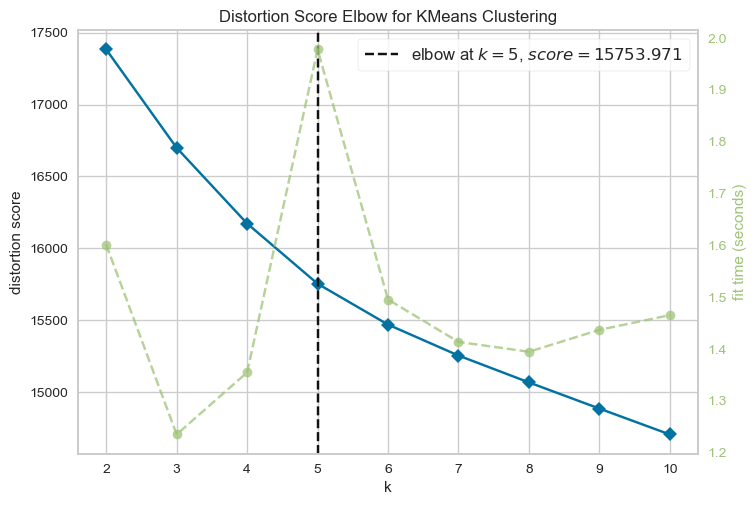

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [30]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
PCA_ds["Clusters"]= yhat_AC

In [31]:
PCA_ds

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,Clusters
0,1.746616,-0.090506,0.165726,1.071407,-0.114085,0.170423,0.662680,-0.026072,0.182512,0.115241,...,0.049054,-0.013239,0.044890,-0.108457,-0.134130,-0.039701,-0.266949,0.015504,-0.289041,3
1,0.432124,-0.034445,0.082438,-0.253160,0.554537,1.170644,-1.115763,0.192992,-0.275697,0.279889,...,-0.031223,0.015531,0.344762,-0.168062,-0.133367,-0.130160,0.035665,0.081641,-0.191525,1
2,1.020110,0.278415,-0.019456,0.460535,-0.079022,0.060216,0.287882,0.327772,0.309914,-0.377912,...,0.279091,0.120769,0.391279,0.245708,0.104762,-0.156212,-0.032434,0.096944,-0.114123,2
3,-0.768730,-0.466064,0.282164,-0.615662,-0.504572,0.591457,0.829260,-0.042469,-0.106075,0.016689,...,-0.045243,0.326838,-0.107917,0.049320,-0.039875,-0.061677,-0.173288,-0.105818,0.156400,0
4,1.366498,-0.102844,0.169527,-0.895470,-0.793414,-0.306327,0.162751,-0.167310,0.167383,0.177371,...,0.207773,-0.610343,-0.048476,-0.311039,0.332594,0.067598,-0.216932,-0.047471,-0.033166,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3306,0.836203,-0.048823,0.721927,0.757994,-0.176700,-0.230227,-1.411586,0.464275,0.125821,-0.261392,...,0.369358,0.449643,0.117133,0.268996,0.585642,-0.089093,0.360124,-0.000319,-0.209049,2
3307,-0.857450,0.219268,-0.280621,0.401561,0.022390,0.262707,0.139366,-0.224794,-0.374958,0.283503,...,-0.112134,-0.218601,0.011064,0.369103,0.194169,-0.228536,-0.046504,0.086437,0.055861,0
3308,1.467407,-0.480968,0.048411,-0.301482,-0.800432,-0.005765,0.597870,-0.795762,0.046335,-0.195901,...,-0.003472,-0.141071,0.005632,0.391126,0.225981,0.011493,0.049889,-0.379762,0.402057,1
3309,-0.797187,-0.576736,0.232855,0.118232,0.282906,0.431907,1.218185,-0.075486,0.214047,-0.448304,...,0.381682,0.100849,-0.210413,-0.137628,0.106800,0.067151,-0.031999,-0.052257,0.305647,2


In [32]:
df_merged = PCA_ds.copy()
df_merged['Voting_Intentions'] = y

In [33]:
df_merged

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,Clusters,Voting_Intentions
0,1.746616,-0.090506,0.165726,1.071407,-0.114085,0.170423,0.662680,-0.026072,0.182512,0.115241,...,-0.013239,0.044890,-0.108457,-0.134130,-0.039701,-0.266949,0.015504,-0.289041,3,Sx/CSx
1,0.432124,-0.034445,0.082438,-0.253160,0.554537,1.170644,-1.115763,0.192992,-0.275697,0.279889,...,0.015531,0.344762,-0.168062,-0.133367,-0.130160,0.035665,0.081641,-0.191525,1,M5S
2,1.020110,0.278415,-0.019456,0.460535,-0.079022,0.060216,0.287882,0.327772,0.309914,-0.377912,...,0.120769,0.391279,0.245708,0.104762,-0.156212,-0.032434,0.096944,-0.114123,2,Sx/CSx
3,-0.768730,-0.466064,0.282164,-0.615662,-0.504572,0.591457,0.829260,-0.042469,-0.106075,0.016689,...,0.326838,-0.107917,0.049320,-0.039875,-0.061677,-0.173288,-0.105818,0.156400,0,Sx/CSx
4,1.366498,-0.102844,0.169527,-0.895470,-0.793414,-0.306327,0.162751,-0.167310,0.167383,0.177371,...,-0.610343,-0.048476,-0.311039,0.332594,0.067598,-0.216932,-0.047471,-0.033166,2,M5S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3306,0.836203,-0.048823,0.721927,0.757994,-0.176700,-0.230227,-1.411586,0.464275,0.125821,-0.261392,...,0.449643,0.117133,0.268996,0.585642,-0.089093,0.360124,-0.000319,-0.209049,2,Sx/CSx
3307,-0.857450,0.219268,-0.280621,0.401561,0.022390,0.262707,0.139366,-0.224794,-0.374958,0.283503,...,-0.218601,0.011064,0.369103,0.194169,-0.228536,-0.046504,0.086437,0.055861,0,Dx/CDx
3308,1.467407,-0.480968,0.048411,-0.301482,-0.800432,-0.005765,0.597870,-0.795762,0.046335,-0.195901,...,-0.141071,0.005632,0.391126,0.225981,0.011493,0.049889,-0.379762,0.402057,1,Sx/CSx
3309,-0.797187,-0.576736,0.232855,0.118232,0.282906,0.431907,1.218185,-0.075486,0.214047,-0.448304,...,0.100849,-0.210413,-0.137628,0.106800,0.067151,-0.031999,-0.052257,0.305647,2,Dx/CDx


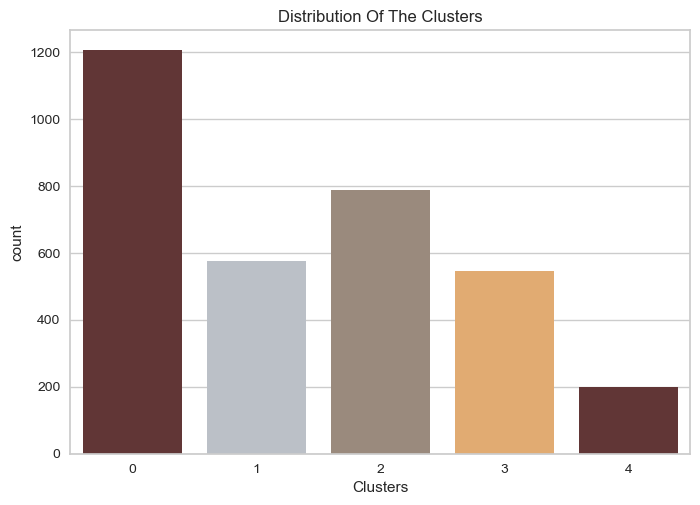

In [34]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=PCA_ds["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [35]:
count_table = pd.crosstab(df_merged['Clusters'], df_merged['Voting_Intentions'])

print(count_table)

Voting_Intentions  Dx/CDx  M5S  Sx/CSx
Clusters                              
0                     699  374     132
1                      65  211     299
2                     230  200     358
3                       6   35     504
4                      94   49      55


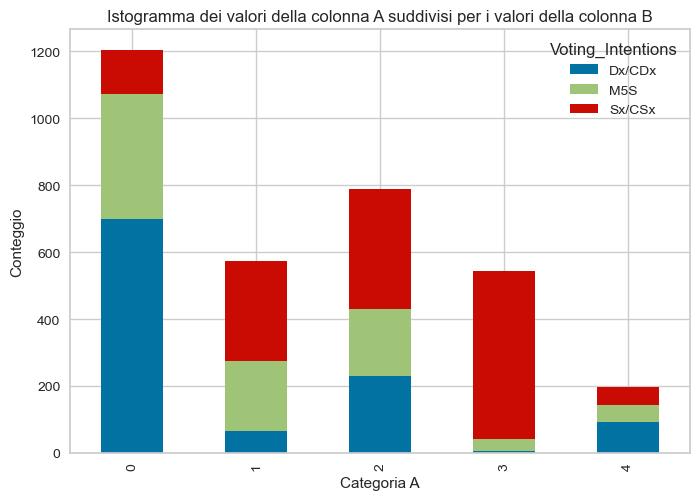

In [36]:
pivot_table = df_merged.pivot_table(index='Clusters', columns='Voting_Intentions', aggfunc='size', fill_value=0)

# Creazione dell'istogramma
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Categoria A')
plt.ylabel('Conteggio')
plt.title('Istogramma dei valori della colonna A suddivisi per i valori della colonna B')
plt.show()

In [37]:
from sklearn.mixture import GaussianMixture

# Creazione dell'istanza GMM
gmm = GaussianMixture(n_components=5, random_state=42)

# Applicazione di GMM al dataset scalato
gmm_labels = gmm.fit_predict(X)

In [38]:
from sklearn.metrics import silhouette_score

# Calcolo del Silhouette Score
silhouette_agg = silhouette_score(X, yhat_AC)
silhouette_gmm = silhouette_score(X, gmm_labels)

print("Silhouette Score for Agglomerative Clustering:", silhouette_agg)
print("Silhouette Score for GMM:", silhouette_gmm)


Silhouette Score for Agglomerative Clustering: 0.04727629888482887
Silhouette Score for GMM: 0.05660508978313904


In [39]:
from sklearn.metrics import davies_bouldin_score

# Calcolo del Davies-Bouldin Index
db_index_agg = davies_bouldin_score(X, yhat_AC)
db_index_gmm = davies_bouldin_score(X, gmm_labels)


print("Davies-Bouldin Index for Agglomerative Clustering:", db_index_agg)
print("Davies-Bouldin Index for GMM:", db_index_gmm)


Davies-Bouldin Index for Agglomerative Clustering: 3.5273647711814724
Davies-Bouldin Index for GMM: 4.200995633160926


In [43]:
X

,Age,Public_Sector_Worker_Privilege,Risk_Propensity_Italy_vs_Europe,Importance_of_Parties,Decrease_in_Party_Role,Reliance_on_Public_Technocrats,Resistance_Values_from_Another_Era,Unions_Still_Useful,Social_Equality_Restrains_Individuals,Too_Much_Focus_on_Equality_vs_Merit,...,View_of_Common_Good_in_Municipality,Associative_Activities_in_Italy,Importance_of_Altruism_in_Society,Importance_of_Mutualism_in_Society,Damage_of_Populism_in_Italy,Weight_of_Volunteering_in_National_Economy,Positive_Attitude_Towards_Immigrants,Nation_vs_Europe,Tolerance_and_Trust_Towards_Islam,The_Populist_Danger
0,0.611111,0.50,0.25,0.75,0.00,0.25,0.25,0.75,0.25,0.50,...,0.25,0.75,0.75,0.25,1.0,1.00,1.0,1.0,1.0,1.0
1,0.236111,1.00,0.25,0.25,1.00,0.50,0.75,0.25,0.75,0.75,...,0.25,0.75,0.75,0.75,0.0,0.25,0.0,1.0,1.0,0.0
2,0.527778,0.50,0.75,0.75,0.00,0.50,0.50,0.75,0.50,0.50,...,0.25,1.00,0.25,0.25,0.5,1.00,1.0,1.0,0.0,1.0
3,0.388889,0.25,0.25,0.50,0.75,1.00,1.00,0.25,1.00,0.75,...,0.25,0.25,1.00,1.00,0.0,0.75,1.0,0.0,0.0,0.0
4,0.597222,0.50,0.25,0.50,0.75,0.75,0.50,0.75,0.50,0.50,...,0.00,0.25,1.00,0.75,1.0,1.00,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3306,0.430556,1.00,0.00,0.75,0.00,0.50,0.00,0.75,0.00,1.00,...,0.25,0.50,0.25,0.25,1.0,0.75,0.0,1.0,0.0,1.0
3307,0.791667,0.75,0.50,0.75,0.00,0.50,0.75,0.50,0.75,0.75,...,0.75,0.75,0.75,0.75,0.0,1.00,0.0,0.0,0.0,0.0
3308,0.750000,0.75,0.25,0.75,0.75,0.75,0.50,0.75,0.50,0.25,...,0.25,0.75,0.75,1.00,1.0,0.75,1.0,0.0,1.0,1.0
3309,0.569444,0.75,0.75,0.75,0.75,0.50,1.00,0.75,1.00,1.00,...,0.00,0.75,0.75,0.25,0.0,0.75,1.0,0.0,0.0,0.0


In [40]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Supponiamo di avere le etichette vere in `true_labels`
y

# ARI
ari_agg = adjusted_rand_score(y, yhat_AC)
ari_gmm = adjusted_rand_score(y, gmm_labels)

print("ARI for Agglomerative Clustering:", ari_agg)
print("ARI for GMM:", ari_gmm)

# Normalized Mutual Information
nmi_agg = normalized_mutual_info_score(y, yhat_AC)
nmi_gmm = normalized_mutual_info_score(y, gmm_labels)

print("NMI for Agglomerative Clustering:", nmi_agg)
print("NMI for GMM:", nmi_gmm)


ARI for Agglomerative Clustering: 0.14325470968469114
ARI for GMM: 0.17857162096106324
NMI for Agglomerative Clustering: 0.16859282457231092
NMI for GMM: 0.17676978235304946


In [41]:
# Trova le etichette uniche e i loro conteggi
unique_labels, counts = np.unique(gmm_labels, return_counts=True)

# Stampa le etichette uniche e i loro conteggi
for label, count in zip(unique_labels, counts):
    print("Etichetta:", label, "- Numero di Occorrenze:", count)

Etichetta: 0 - Numero di Occorrenze: 1526
Etichetta: 1 - Numero di Occorrenze: 738
Etichetta: 2 - Numero di Occorrenze: 159
Etichetta: 3 - Numero di Occorrenze: 454
Etichetta: 4 - Numero di Occorrenze: 434


In [42]:
y

0       Sx/CSx
1          M5S
2       Sx/CSx
3       Sx/CSx
4          M5S
         ...  
3306    Sx/CSx
3307    Dx/CDx
3308    Sx/CSx
3309    Dx/CDx
3310    Dx/CDx
Name: Voting_Intentions, Length: 3311, dtype: object

In [44]:
from scipy.stats import entropy
from collections import Counter

# Carica il dataset Iri

# Crea una tabella di contingenza
contingency_matrix = pd.crosstab(yhat_AC, y)

def calculate_cluster_entropy(cluster):
    total_points = np.sum(cluster)
    ent = 0.0
    for count in cluster:
        if count > 0:
            prob = count / total_points
            ent -= prob * np.log2(prob)
    return ent

def calculate_cluster_gini_impurity(cluster):
    total_points = np.sum(cluster)
    gini = 1.0
    for count in cluster:
        prob = count / total_points
        gini -= prob**2
    return gini

# Calcola l'entropia e l'impurità di Gini per ciascun cluster
entropies = []
gini_impurities = []
for cluster in contingency_matrix.values:
    entropies.append(calculate_cluster_entropy(cluster))
    gini_impurities.append(calculate_cluster_gini_impurity(cluster))

# Calcola l'entropia media e l'impurità di Gini media
mean_entropy = np.mean(entropies)
mean_gini_impurity = np.mean(gini_impurities)

print("Entropia media dei cluster:", mean_entropy)
print("Impurità di Gini media dei cluster:", mean_gini_impurity)


Entropia media dei cluster: 1.2392365692926126
Impurità di Gini media dei cluster: 0.5116175956515233
